1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('water.csv')
df.head(5)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


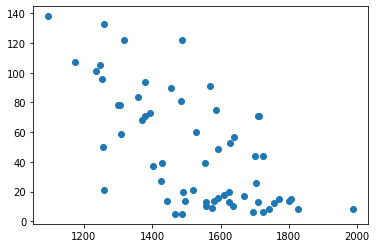

In [3]:
plt.scatter(df['mortality'], df['hardness'])

In [4]:
# Корреляция Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
# Корреляция Спирмена
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
# Модель линейной регрессии
mortality = df[['mortality']].values # X
hardness = df['hardness'].values     # Y

model = LinearRegression()
model.fit(mortality, hardness)
model.score(mortality, hardness)

0.4288267193124973

In [7]:
model.coef_

array([-0.13292453])

In [8]:
model.intercept_

249.77692756960676

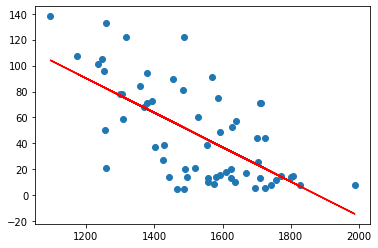

In [9]:
# График
plt.scatter(df['mortality'], df['hardness'])
plt.plot(df['mortality'], model.predict(df[['mortality']]), c='r')

In [10]:
# Коэффициент детерминации рассчетный

df['SST'] = np.square(df['hardness'] - df['hardness'].mean())
df['SSR'] = np.square(model.predict(df[['mortality']]) - df['hardness'].mean())
print ("R2: ", df['SSR'].sum() / df['SST'].sum())

R2:  0.4288267193124971


In [11]:
# Коэффициент детерминации 
print('R2:', r2_score(df['hardness'], model.predict(df[['mortality']])))

R2: 0.4288267193124973


In [12]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [13]:
# Альтернативный способ
X = sm.add_constant(mortality)

In [14]:
model_2 = sm.OLS(hardness, X)
results = model_2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           1.03e-08
Time:                        19:20:33   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

In [15]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 2.49776928e+02 -1.32924533e-01]
R2:  0.42882671931249716


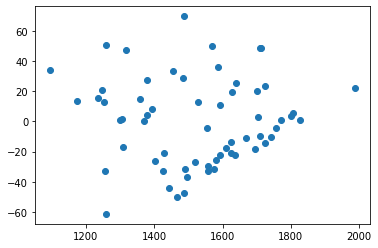

In [16]:
# График остатков
plt.scatter(X[:, 1], results.resid)

(array([ 2.,  3., 11., 10.,  9.,  9.,  8.,  3.,  5.,  1.]),
 array([-61.29201633, -48.18792189, -35.08382745, -21.97973301,
         -8.87563857,   4.22845587,  17.33255031,  30.43664475,
         43.54073919,  56.64483363,  69.74892807]),
 <a list of 10 Patch objects>)

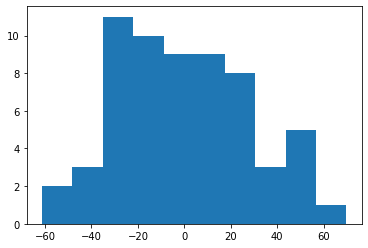

In [17]:
# Распределение остатков
plt.hist(results.resid)

ВЫВОД: существует обратная связь между жёсткостью воды и средней годовой смертностью. Следовательно, чем меньше жесткость воды, тем смерность больше. 
Построенная модель регрессии как на графике так и по коэффициенту детерминации является не наилучшей, но отражающей общую концепцию зависимости.

In [18]:
# 2 задание

In [19]:
df_South = df[ df['location'] == 'South' ]
df_North = df[ df['location'] == 'North' ]

In [20]:
# Для региона South

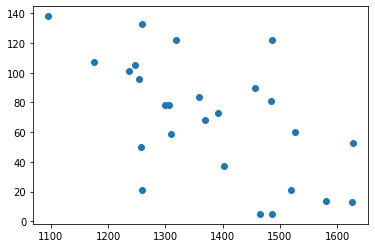

In [21]:
plt.scatter(df_South['mortality'], df_South['hardness'])

In [22]:
# Корреляция Пирсона
df_South[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [23]:
# Корреляция Спирмена
df_South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


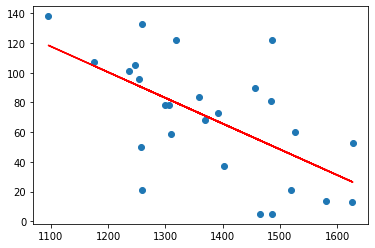

In [24]:
# Модель линейной регрессии South
model = LinearRegression()
model.fit(df_South[['mortality']].values, df_South['hardness'].values)
model.score(df_South[['mortality']].values, df_South['hardness'].values)

# График
plt.scatter(df_South['mortality'], df_South['hardness'])
plt.plot(df_South['mortality'], model.predict(df_South[['mortality']]), c='r')

In [25]:
# Модель линейной регрессии South
X = sm.add_constant(df_South[['mortality']].values)

model = sm.OLS(df_South['hardness'].values, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Sun, 01 Nov 2020   Prob (F-statistic):            0.00113
Time:                        19:20:35   Log-Likelihood:                -126.67
No. Observations:                  26   AIC:                             257.3
Df Residuals:                      24   BIC:                             259.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.3177     64.883      4.752      0.0

In [26]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 3.08317671e+02 -1.73261990e-01]
R2:  0.3625885624364602


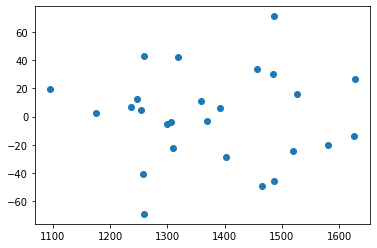

In [27]:
# График остатков South
plt.scatter(X[:, 1], results.resid)

ВЫВОД: по Южным городам существует обратная связь между жёсткостью воды и средней годовой смертностью. Следовательно, чем меньше жесткость воды, тем смерность больше. 
Построенная модель регрессии  на графике является визуально хуже отражающей  зависимость, т.к. облако данных больше. Коэффициент детерминации еще меньше, чем у варианта с общими данными.

In [28]:
# Для региона North

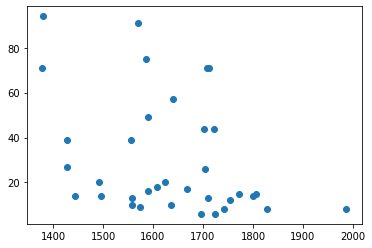

In [29]:
plt.scatter(df_North['mortality'], df_North['hardness'])

In [30]:
# Корреляция Пирсона
df_North[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [31]:
# Корреляция Спирмена
df_North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


R2: 0.1358643664207173


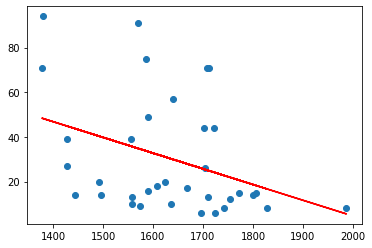

In [32]:
# Модель линейной регрессии North
model = LinearRegression()
model.fit(df_North[['mortality']].values, df_North['hardness'].values)
# Коэффициент детерминации 
print('R2:', model.score(df_North[['mortality']].values, df_North['hardness'].values))

# График North
plt.scatter(df_North['mortality'], df_North['hardness'])
plt.plot(df_North['mortality'], model.predict(df_North[['mortality']]), c='r')

In [33]:
# Модель линейной регрессии North
X = sm.add_constant(df_North[['mortality']].values)

model = sm.OLS(df_North['hardness'].values, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Sun, 01 Nov 2020   Prob (F-statistic):             0.0293
Time:                        19:20:36   Log-Likelihood:                -160.81
No. Observations:                  35   AIC:                             325.6
Df Residuals:                      33   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.3191     50.623      2.871      0.0

In [34]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.45319062e+02 -7.03471243e-02]
R2:  0.1358643664207171


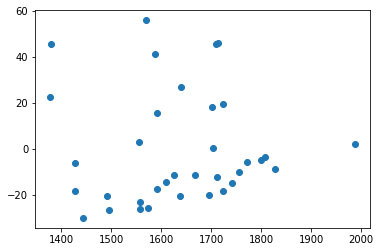

In [35]:
# График остатков для North
plt.scatter(X[:, 1], results.resid)

ВЫВОД: по Северным городам существует обратная связь между жёсткостью воды и средней годовой смертностью. Следовательно, чем меньше жесткость воды, тем смерность больше. 
Построенная модель регрессии на графике является визуально еще хуже отражающей зависимость, т.к. облако данных больше и хаотичнее, чем у двух выше рассмотренных вариантов. Коэффициент детерминации еще меньше, чем у варианта с общими данными и у Южных городов. По графику видно, что зависимость слабая.